# Guía para segundo entregable del reto: Frenado Electromagnético

Clase: F1014B Modelación Computacional de Sistemas Electromagnéticos

Autor: Edoardo Bucheli

Profesor de Cátedra, Tec de Monterrey Campus Santa Fe

## Graficar la Posición y Velocidad con respecto al tiempo

En este entregable queremos simular la caída de un diplo magnético frenado por un anillo de con corriente.

Para lograr esto definimos la siguiente Ecuación Diferencial de segundo orden,

$$m\frac{d^2z}{dt^2} = -mg - \frac{9(\mu\mu_0)^2a^4}{4R}\frac{z^2}{\sqrt{(z^2+a^2)^5}}\frac{dz}{dt}$$

Con los valores iniciales:

* $t_0$ = 0
* $z_0$ es la altura inicial de tu elección
* $z'_0$ es la velocidad inicial, en este caso 0. 

Donde:

* $z$ es un función del tiempo $t$ y representa la altura del dipolo
* $t$ es el tiempo desde que soltamos el dipolo en segundos
* $m$ es la masa del dipolo.
* $g$ es la aceleración (gravedad por ser caída libre)
* $\mu$: es la permeabilidad máxima del MetGlass
* $\mu$ es la permeabilidad del espacio libre
* $a$: es el radio del anillo en metros
* $R$: es la Resistividad

Para efectos prácticos haremos las siguientes substituciones,

$$k = \frac{9(\mu\mu_0)^2a^4}{4R}$$

y 

$$p(z) = \frac{z^2}{\sqrt{(z^2+a^2)^5}}$$


Y dejando a un lado la notación de Leibnitz obtenemos la ED,

$$m z'' = -m g - k\cdot h(z)\cdot z'$$

## Resolver una ED de segundo orden con Runge-Kutta

En la sesión pasada, aprendimos a resolver una ED con el método de Runge-Kutta. Sin embargo, recordarás que este método sirve para aproximar la solución a ED's de primer orden con valor inicial de la siguiente forma,

$$\frac{dz}{dt}=f(t,z),\qquad z(t_0)=z_0$$

Pero en este caso, nuestra ED es de segundo orden. Afortunadamente, podemos expresar una ED de segundo orden como un sistema de ED's de primer orden con la siguiente forma.

$$x' = f(t,x,y)$$
$$y' = g(t,x,y)$$

Donde $x$ y $y$ son dos nuevas variables que creamos para sustituir los valores antiguos como se mostrará a continuación.

### Generar un sistema de ED de primer orden a partir de una ED de segundo orden

Para hacer esto empezamos por generar la siguiente sustitución,

$$x = z$$
$$y = z'$$

Si derivamos ambas expresiones obtenemos las siguientes observaciones,

$$x' = z' = y$$
$$y'=z''$$

Y de igual manera cambiamos los valores iniciales,

$$x_0 = z_0$$
$$y_0 = z'_0$$

Y cuando sustituimos esto en la ED diferencial original, es decir,

$$mz'' = -mg - k\cdot p(z)\cdot z'$$

Obtenemos,

$$my' = -mg - k \cdot p(x) \cdot y$$

Y tomando una de las ecuaciones anteriores, obtenemos el siguiente sistema de ecuaciones,

$$x' = y$$
$$y' = -g-\frac{k}{m}\cdot p(x) \cdot y$$

Donde podemos ver que,

* $f(t,x,y) = y$
* $g(t,x,y) = -g-\frac{k}{m}\cdot p(x) \cdot y$

### Runge-Kutta para sistema de Ecuaciones

Podemos resolver estas ED's de manera simultánea usando Runge-Kutta. Esto se logra con las siguientes fórmulas iterativas.

$$x_{n+1} = x_n + \frac{h}{6}*(k_{x1}+2k_{x2}+2k_{x3}+k_{x4})$$
$$y_{n+1} = y_n + \frac{h}{6}*(k_{y1}+2k_{y2}+2k_{y3}+k_{y4})$$

Donde:
* $k_{x1} = f(t_n,x_n,y_n)$
* $k_{y1} = g(t_n,x_n,y_n)$
* $k_{x2} = f(t_n+\frac{1}{2}h,x_n+\frac{1}{2}h\cdot k_{x1},y_n+\frac{1}{2}h\cdot k_{y1})$
* $k_{y2} = g(t_n+\frac{1}{2}h,x_n+\frac{1}{2}h\cdot k_{x1},y_n+\frac{1}{2}h\cdot k_{y1})$
* $k_{x3} = f(t_n+\frac{1}{2}h,x_n+\frac{1}{2}h\cdot k_{x2},y_n+\frac{1}{2}h\cdot k_{y2})$
* $k_{y3} = g(t_n+\frac{1}{2}h,x_n+\frac{1}{2}h\cdot k_{x2},y_n+\frac{1}{2}h\cdot k_{y2})$
* $k_{x4} = f(t_n+h,x_n+hk_{x3},y_n+k_{y3})$
* $k_{y4} = g(t_n+h,x_n+hk_{x3},y_n+k_{y3})$

### CUIDADO!

No pienses en $x$ y $y$ como las componentes del plano cartesiano, recuerda con son sustituciones de $z$ y sus derivadas. En ese sentido $z$ y $t$ son las variables que corresponderían a un plano cartesiano.

# Código

Como siempre, empezemos por importar las librerías necesarias. En este caso agregamos tqdm para poder generar una barra de progreso. Si no estás trabajando en un notebook convendrá usar tqdm en lugar de tqdm_notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

Definamos las constantes que vamos a utilizar, puedes jugar con estos parámetros pero te recomendamos unos valores iniciales,

In [2]:
# Aceleración
g = 9.81

# Masa del dipolo
m = 0.01

# es la permeabilidad máxima del MetGlass
mu = 1e6

# Permeabilidad del espacio libre
mu_0 = 4*np.pi*1e-7

# Radio del anillo de corriente
a = 0.08

# Resistividad
R = 9e-5

Ahora calcula la constante $k$ la cual obtenemos con la siguiente expresión,

$$k = \frac{9(\mu\mu_0)^2a^4}{4R}$$

In [3]:
k = # Tu código aquí

Podemos también definir las funciones $p(x)$, $f(t,x,y)$ y $g(t,x,y)$ como se describieron en la sección anterior.

In [4]:
def p():
    # Tu código aquí
    return # Tu código aquí
def f():
    # Tu código aquí
    return # Tu código aquí
def g():
    # Tu código aquí
    return # Tu código aquí

Y ahora que estamos listos definimos los valores iniciales y parámetros para el algoritmo

In [5]:
# Tiempo inicial
t_0 = 0
# Timpo final
t_f = 6

# Altura Inicial z_0
x_0 = 10
# Velocidad Inicial z'_0
y_0 = 0

Esta vez, en lugar de detenernos cuando lleguemos a algún valor, definiremos desde el principio una lista de tiempos $t$ de la siguiente manera.

In [6]:
# Paso horizontal
h = 0.01

# Número de pasos
# Calcula el número de pasos entre t_0 y t_f cuando tienes un paso horizontal de h
N = # Tu código aquí

# Arreglo con valores del tiempo:
# Usa np.linspace() para definir un arreglo que vaya de t_0 a t_n en N pasos
t = # Tu código aquí

### Runge-Kutta

Utilizando la descripción del método de Runge-Kutta de la sección anterior, podemos generar un ciclo que calcule los valores de $x_{n+1}$ y $y_{n+1}$ de manera iterativa.

In [7]:
all_xs = [] 
all_ys = []

# Usar los valores iniciales para el primer paso
x_n = x_0
y_n = y_0

# Iterar para cada paso de la lista de tiempo t
# Usamos tqdm para generar una barra de progreso
for this_t in tqdm_notebook(t):
    
    # Para cada iteración debes calcular x_nplus1 y y_nplus1
    
    # No olvides guardar cada valor x_nplus1 y y_nplus1 calculado 
    # en las listas all_xs y all_ys
    
    # Tampoco olvides actualizar x_n y y_n para calcular algo nuevo 
    # en cada iteración

### Visualización

Si hiciste tus cálculos de manera correcta, con la siguiente celda podrás visualizar el cambio de la altura y velocidad con respecto al tiempo

Text(0, 0.5, 'Velocidad [m/s]')

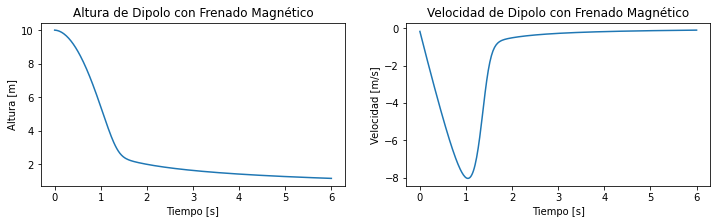

In [8]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)

plt.plot(t,all_xs)
plt.title("Altura de Dipolo con Frenado Magnético")
plt.xlabel("Tiempo [s]")
plt.ylabel("Altura [m]")

plt.subplot(1,2,2)
plt.plot(t,all_ys)
plt.title("Velocidad de Dipolo con Frenado Magnético")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")